In [1]:
import sys
import os
import time
import numpy as np
import tensorflow as tf
import gpflow
import soundfile
import pickle
sys.path.append('../../../../')
import gpitch
from gpitch.amtgp import logistic
from gpitch import myplots
import soundfile
import sounddevice
import peakutils
from scipy import signal
from scipy.fftpack import fft, ifft, ifftshift
from scipy import signal

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 3)  # set plot size

In [3]:
pickleloc = '../../../../../results/files/svi/script/'
bounds = [21, 109]
midi = np.asarray([str(i) for i in range(bounds[0], bounds[1])]).reshape(-1,)

In [4]:
Np = 88
fs = 16e3
m = [pickle.load(open(pickleloc + "maps_pitch_" + midi[i] + ".p", "rb")) for i in range(Np)]
N = m[0].x.value.size
x = m[0].x.value.copy()

/home/paad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/paad/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


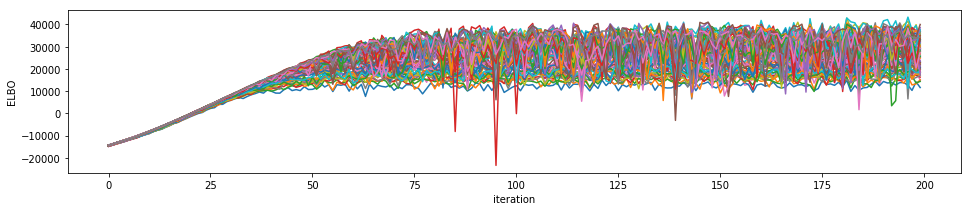

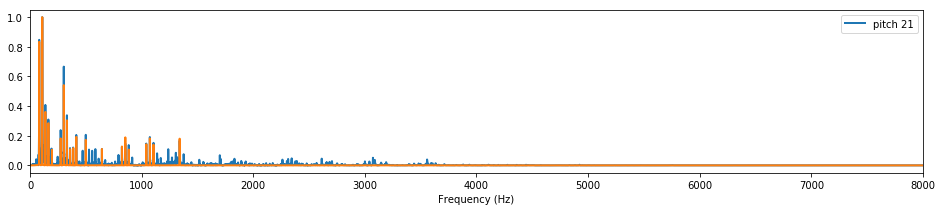

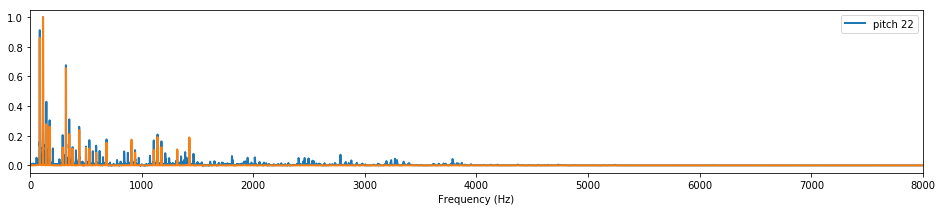

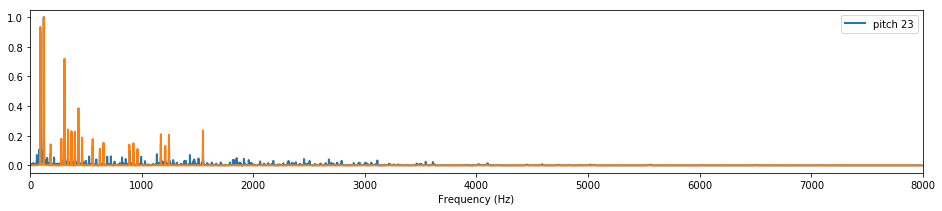

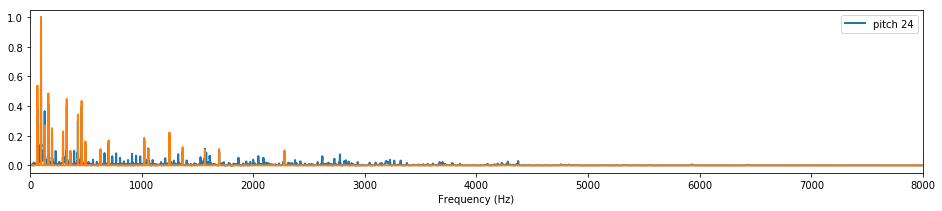

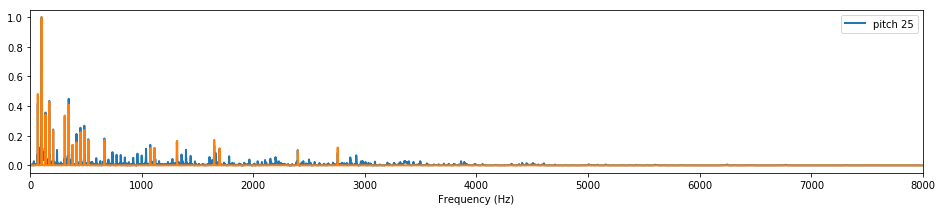

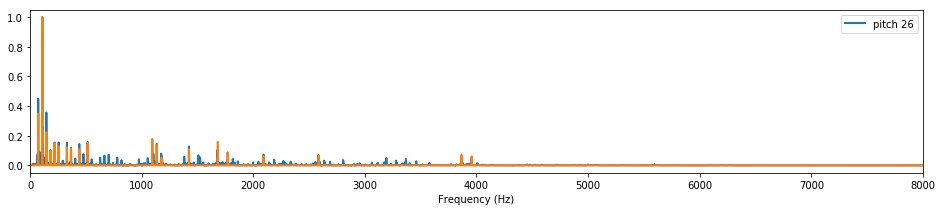

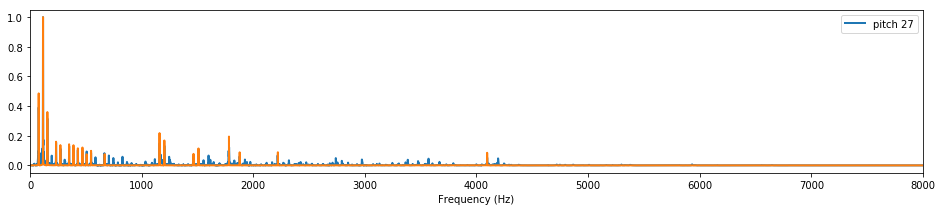

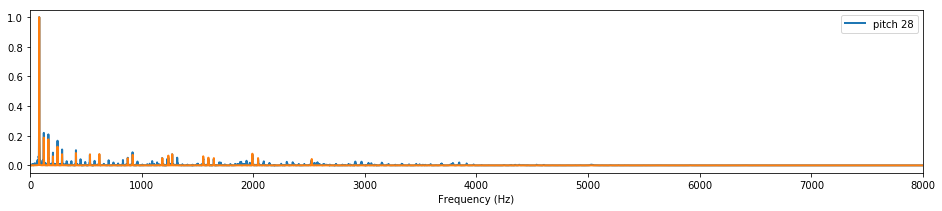

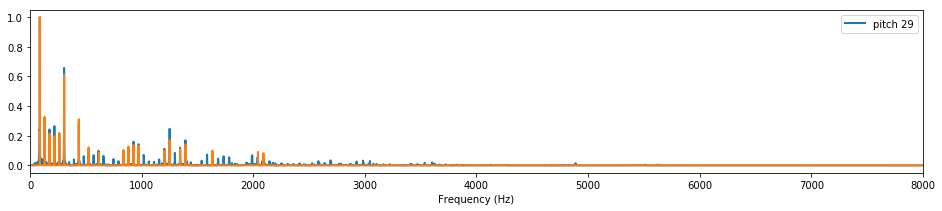

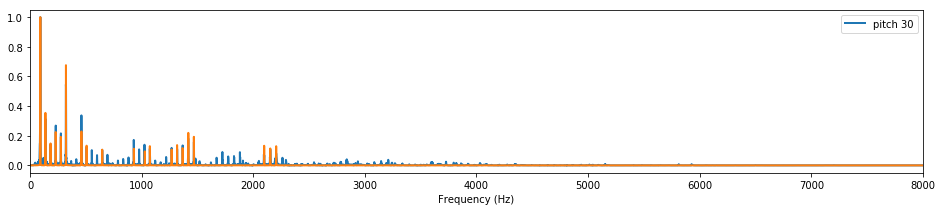

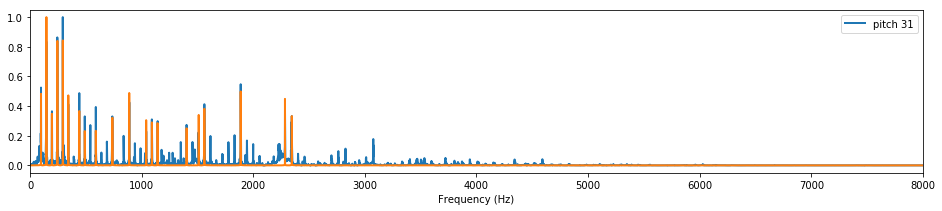

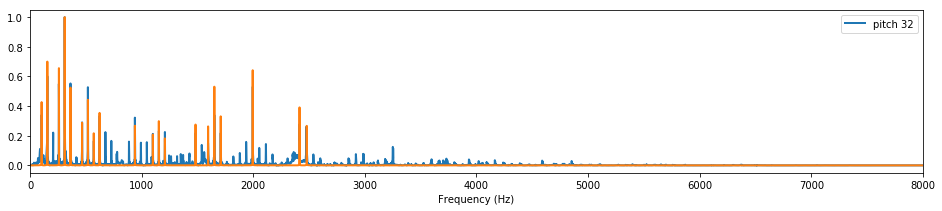

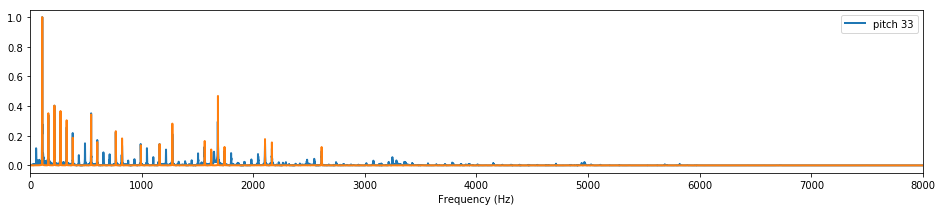

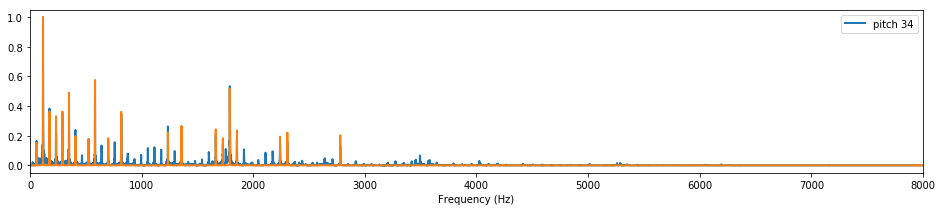

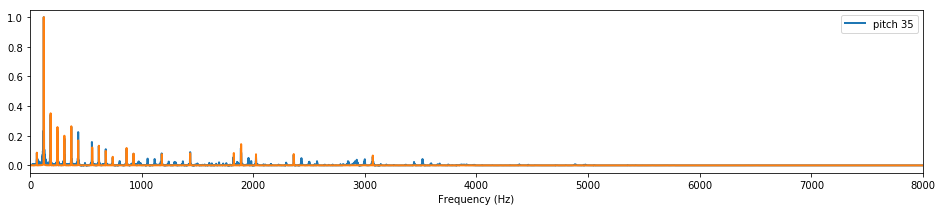

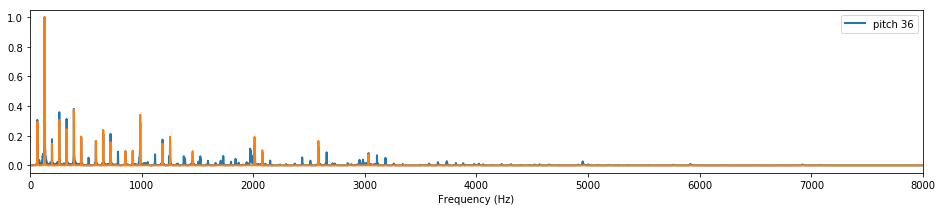

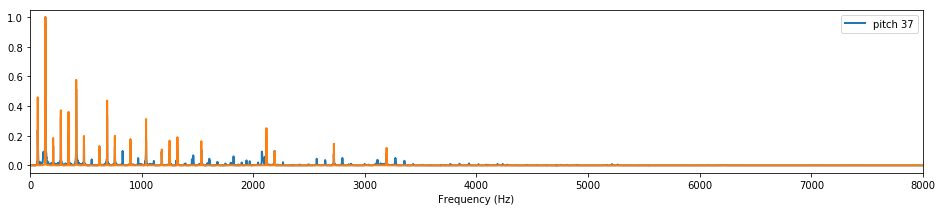

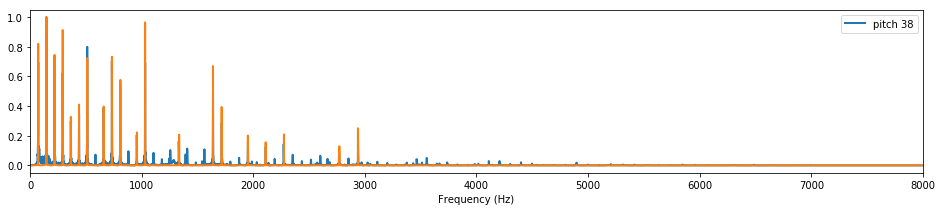

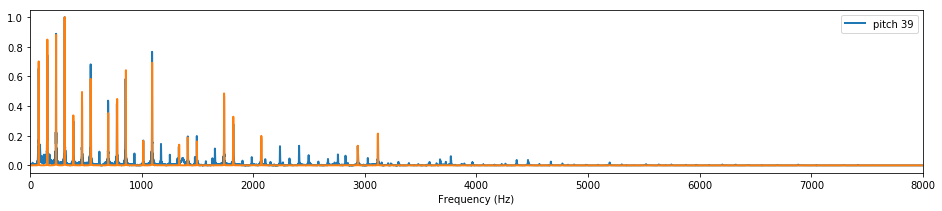

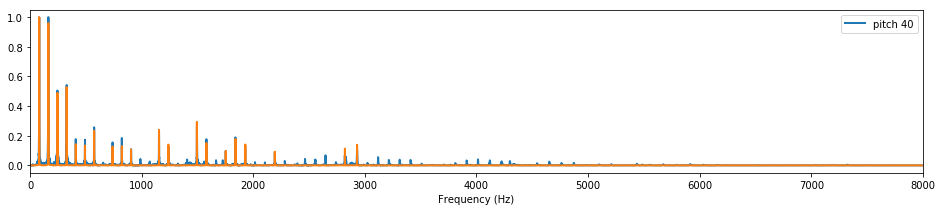

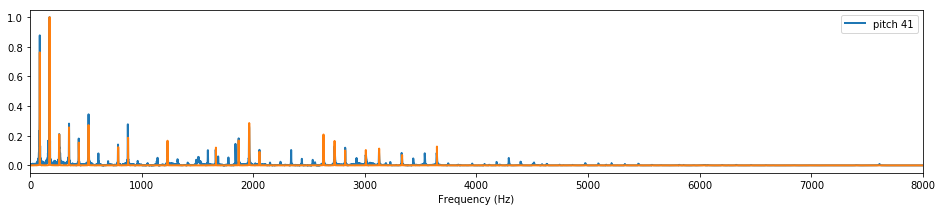

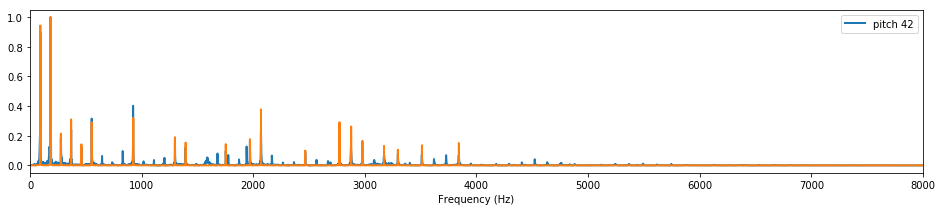

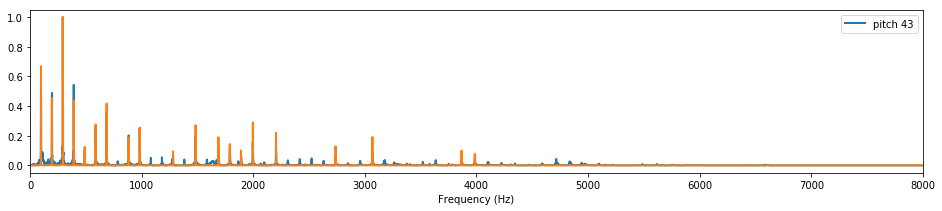

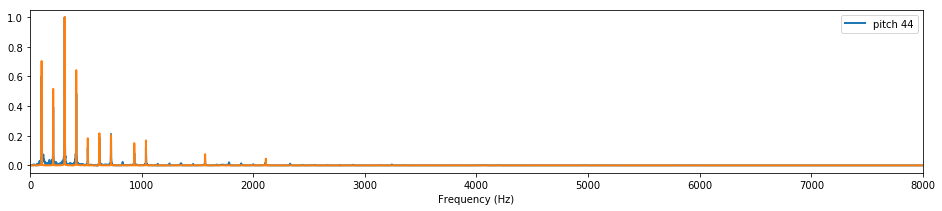

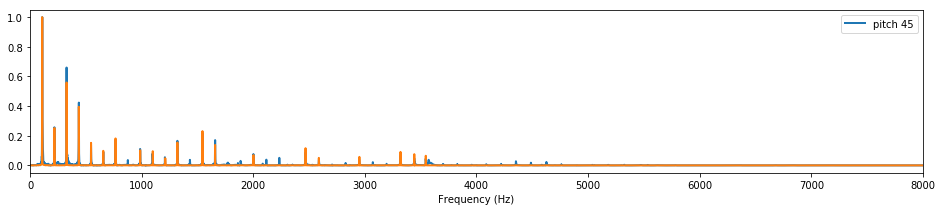

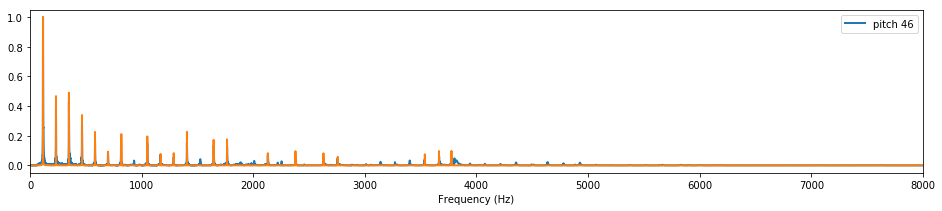

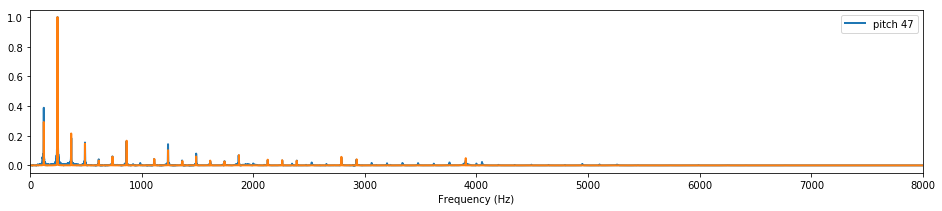

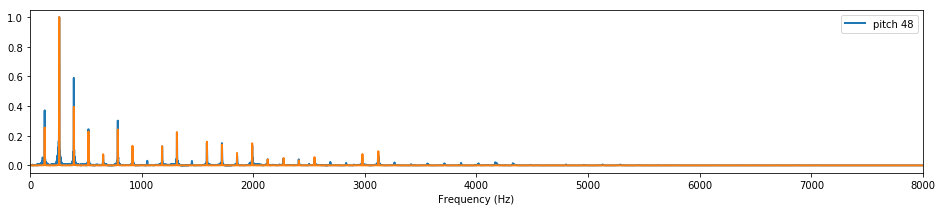

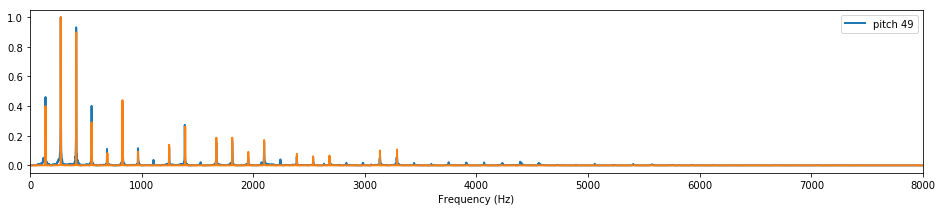

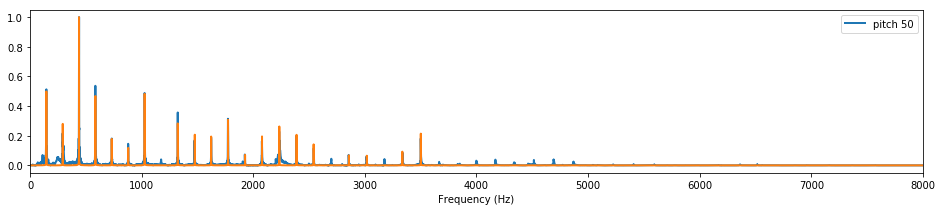

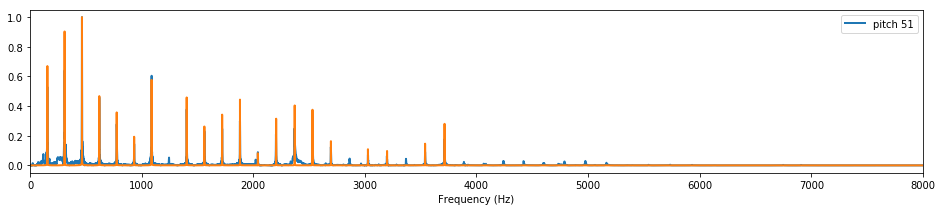

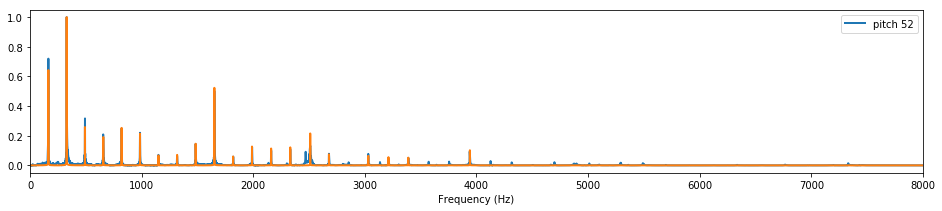

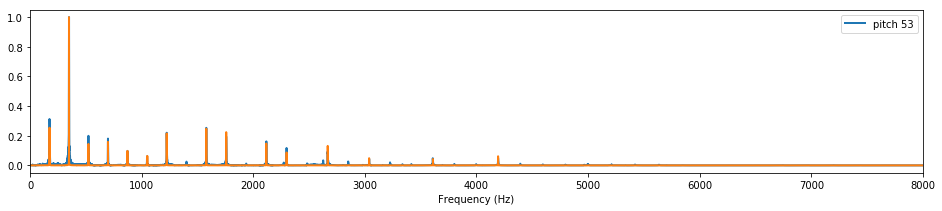

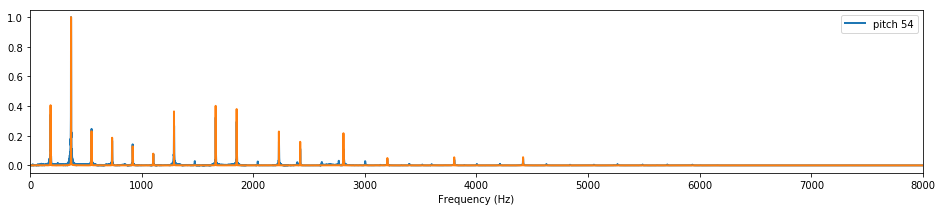

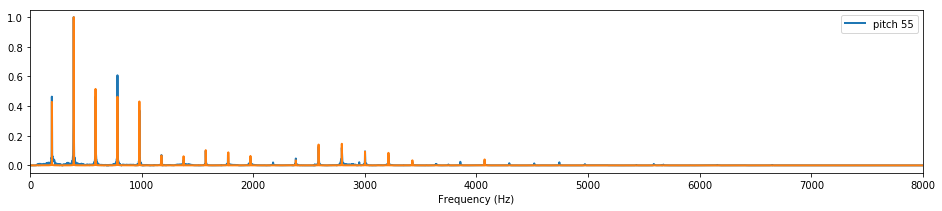

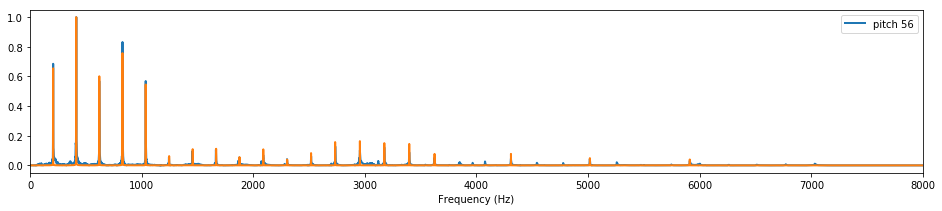

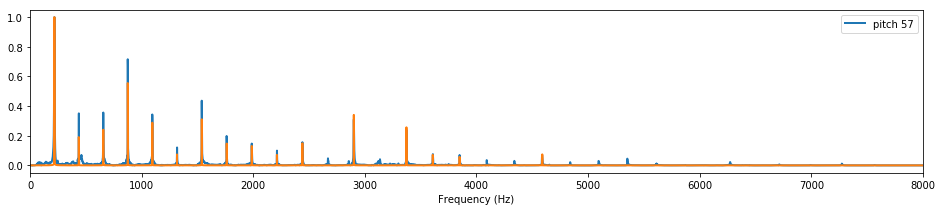

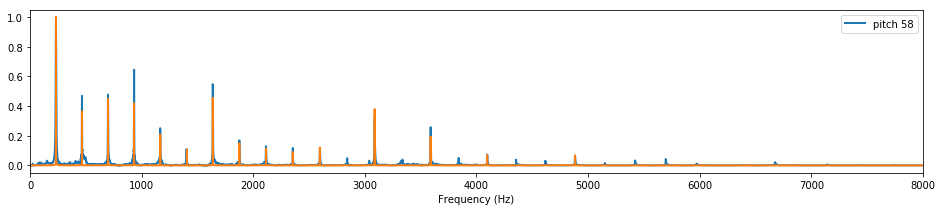

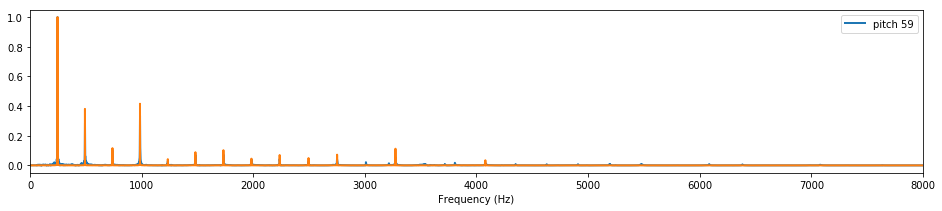

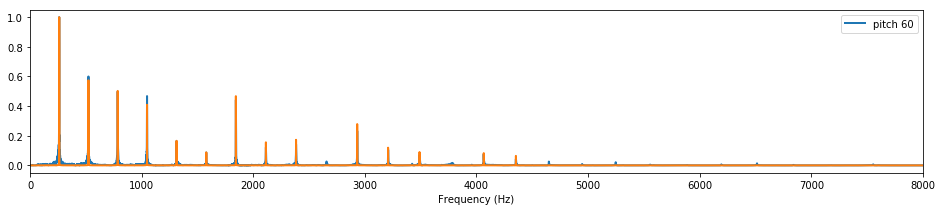

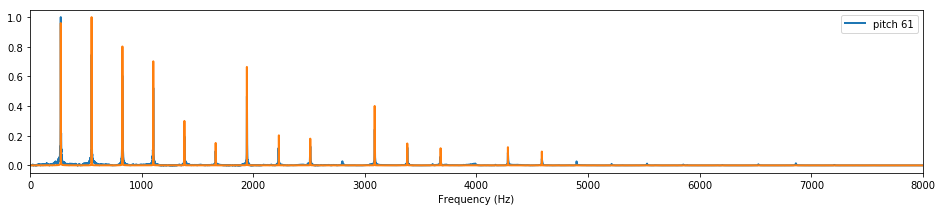

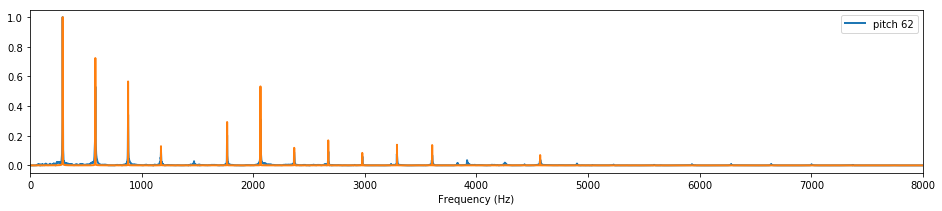

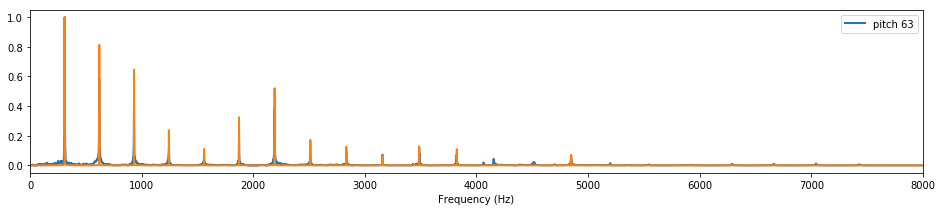

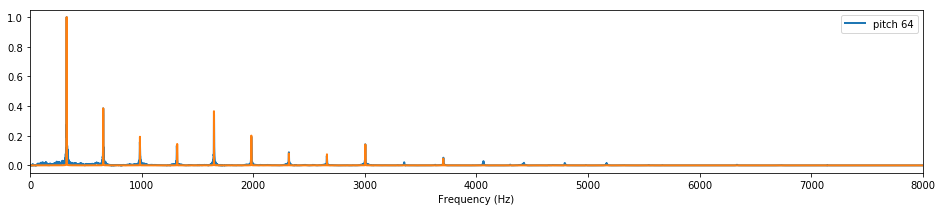

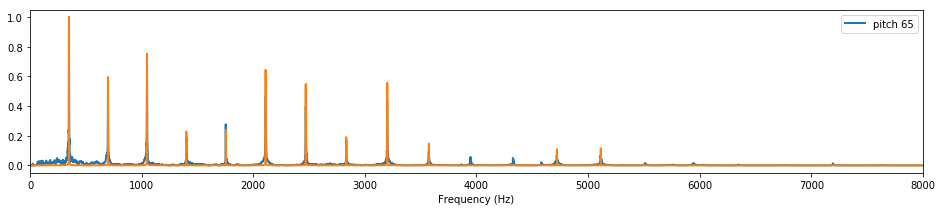

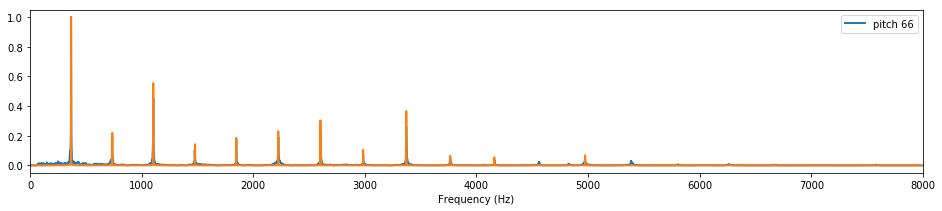

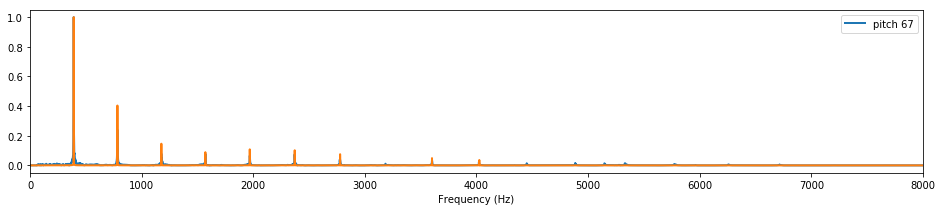

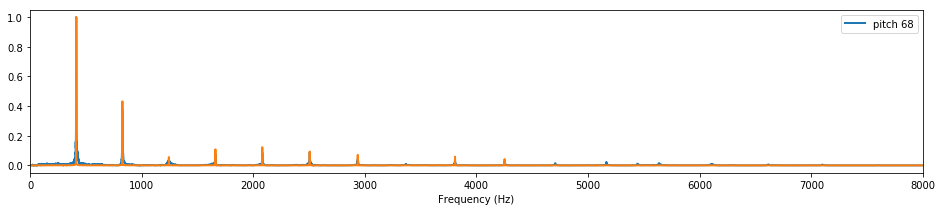

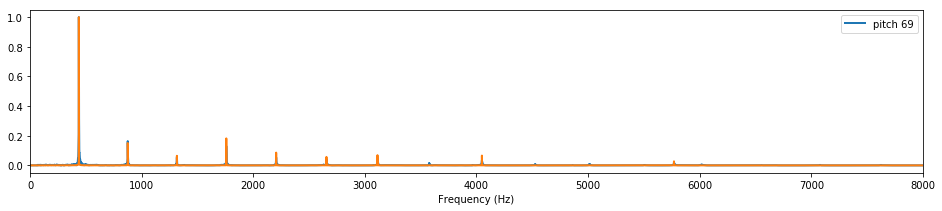

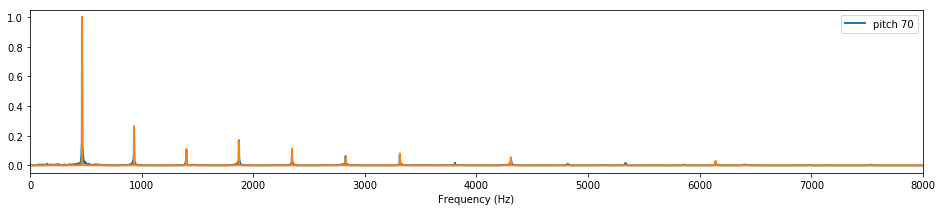

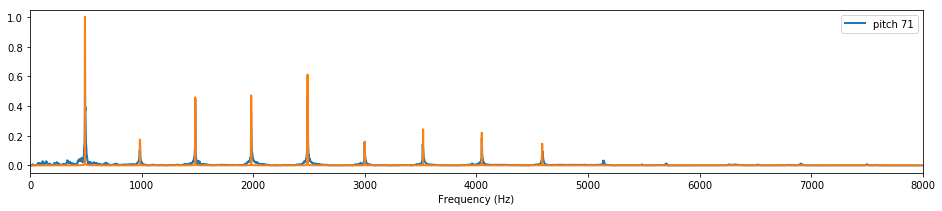

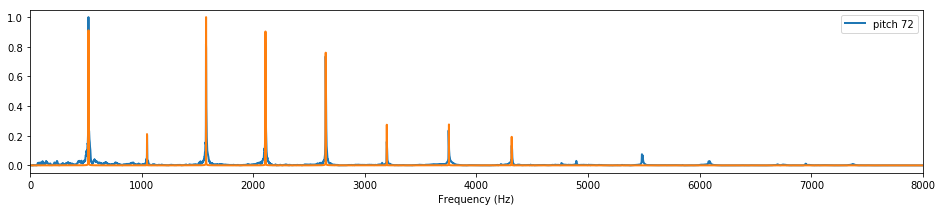

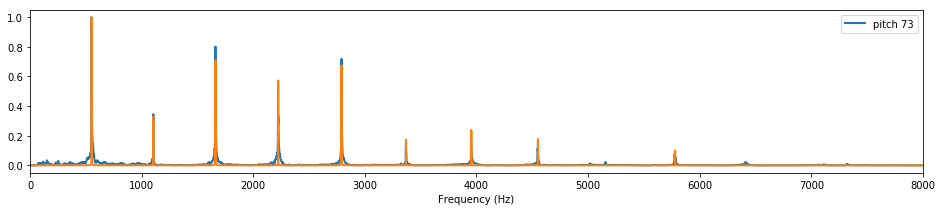

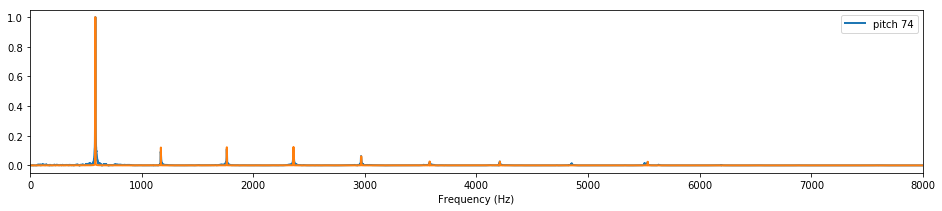

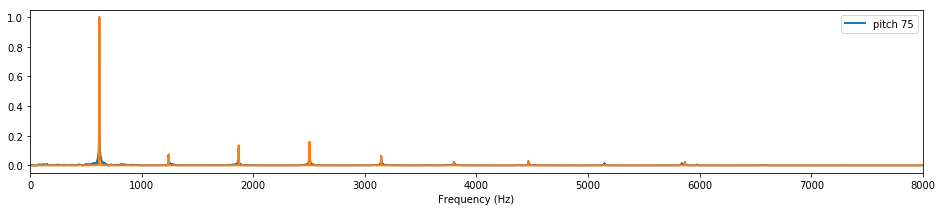

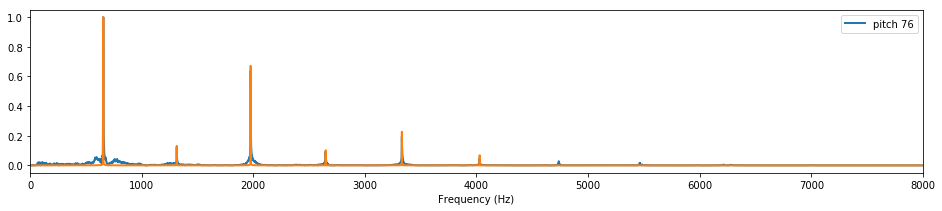

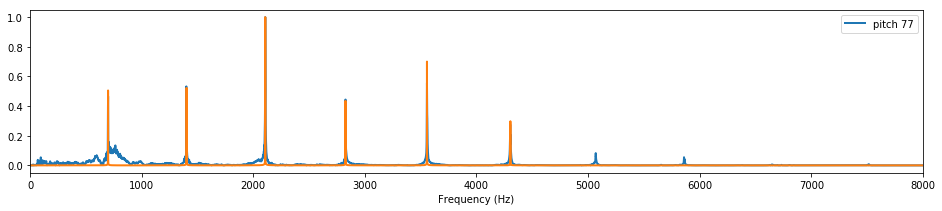

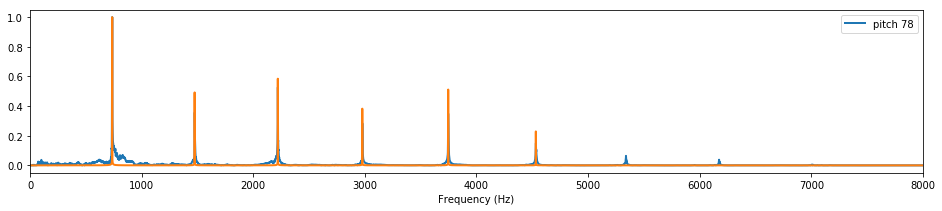

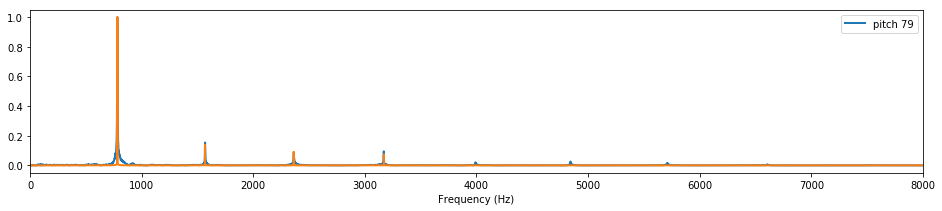

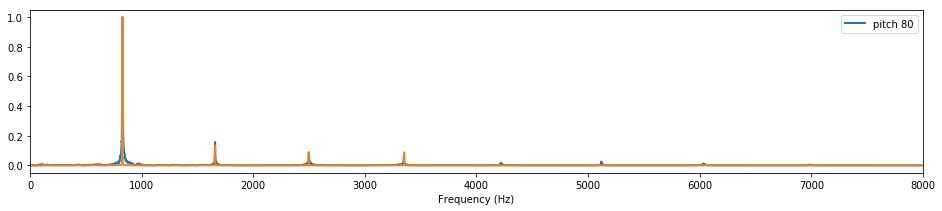

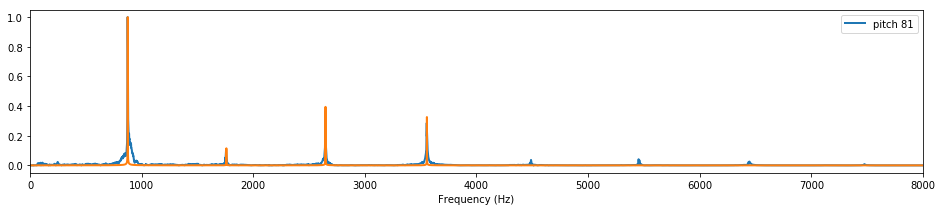

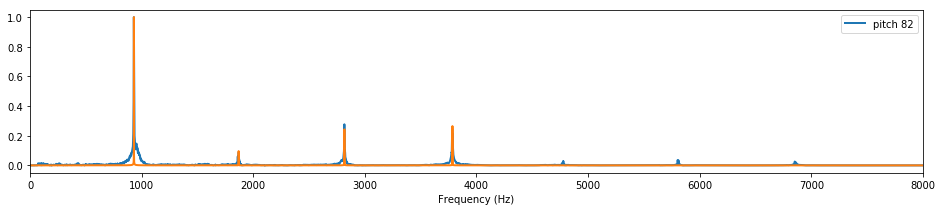

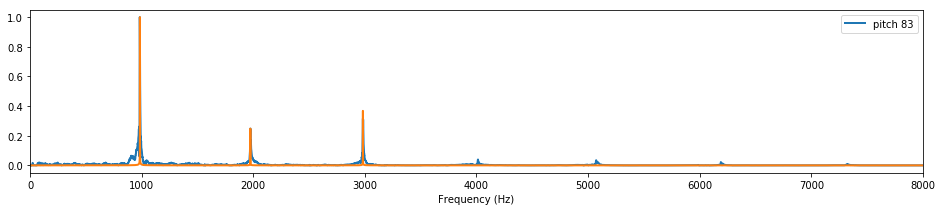

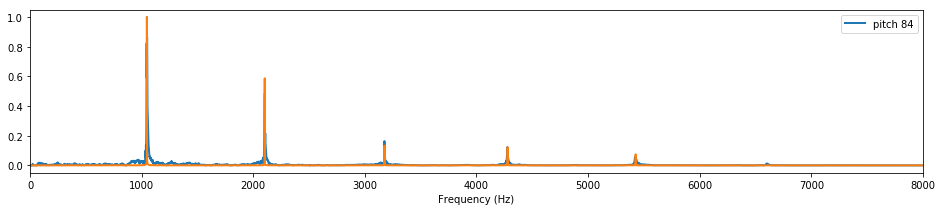

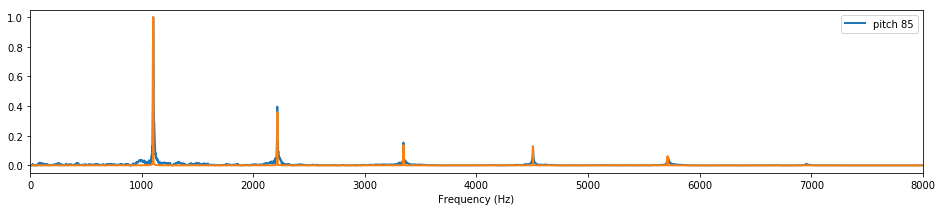

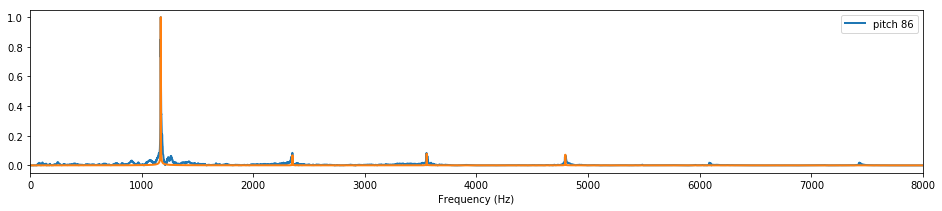

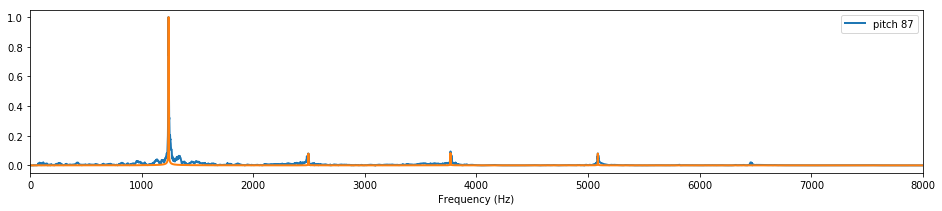

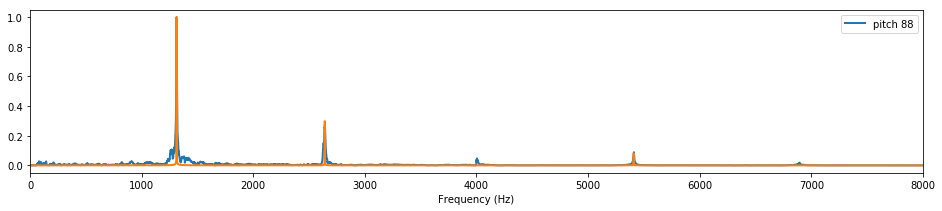

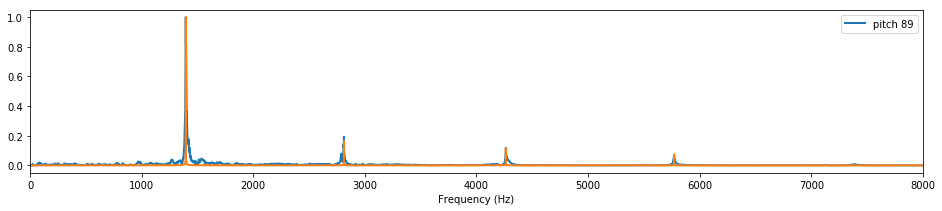

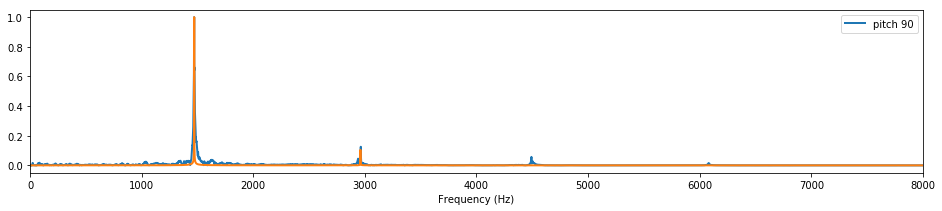

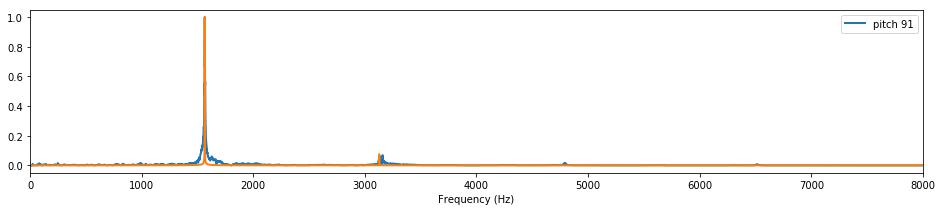

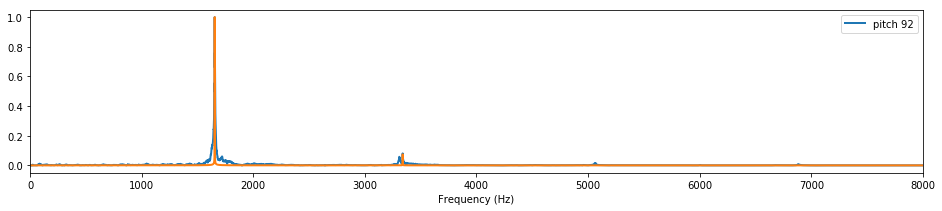

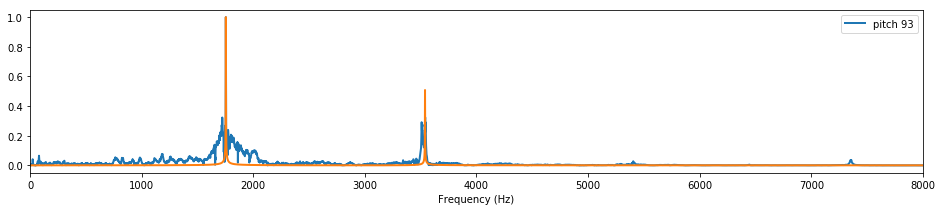

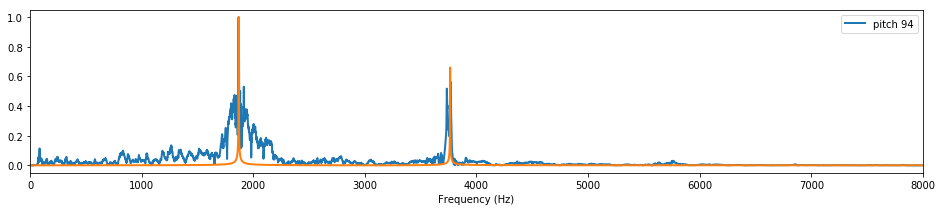

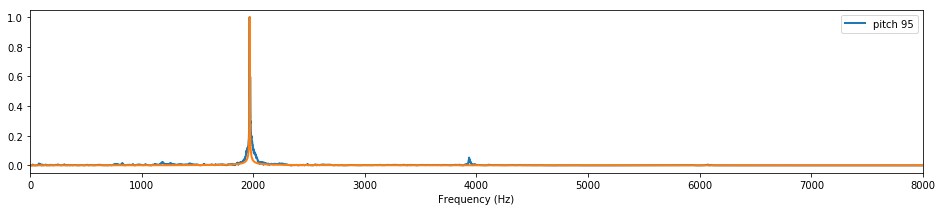

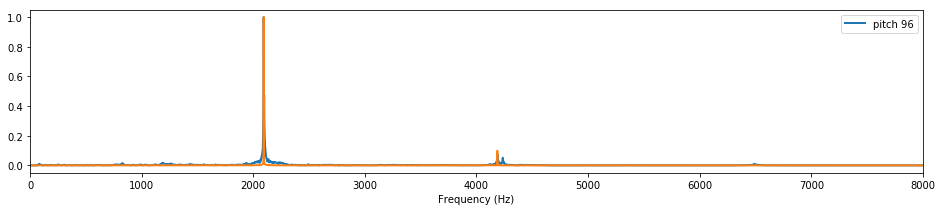

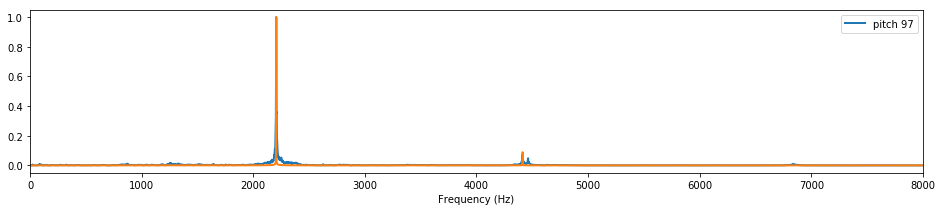

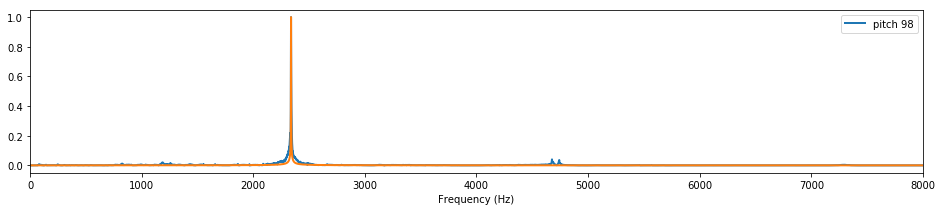

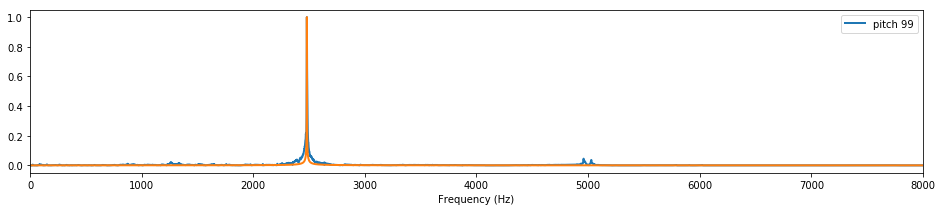

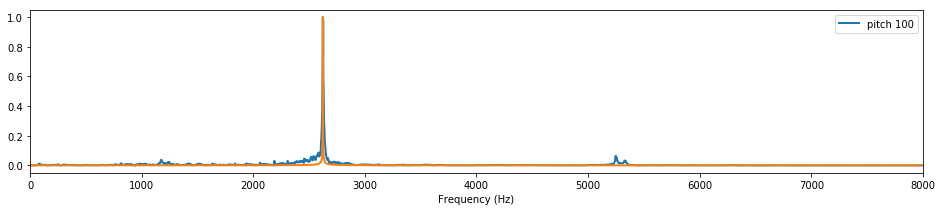

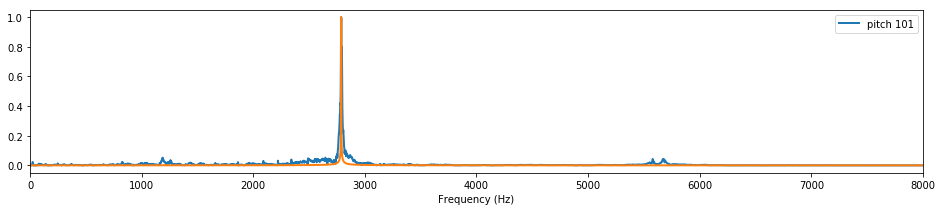

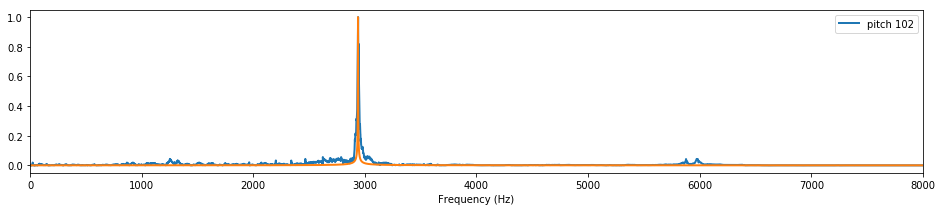

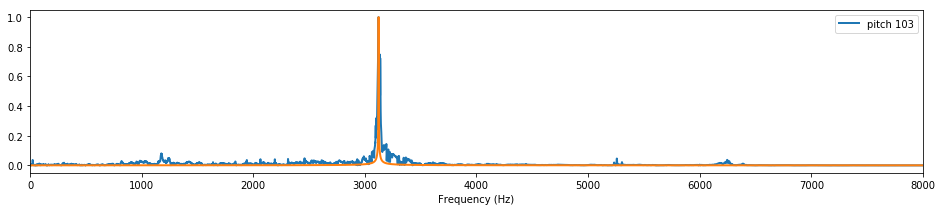

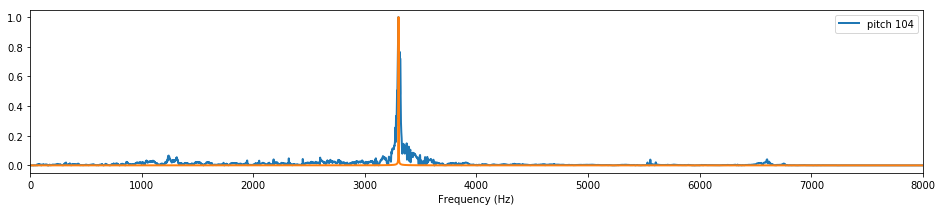

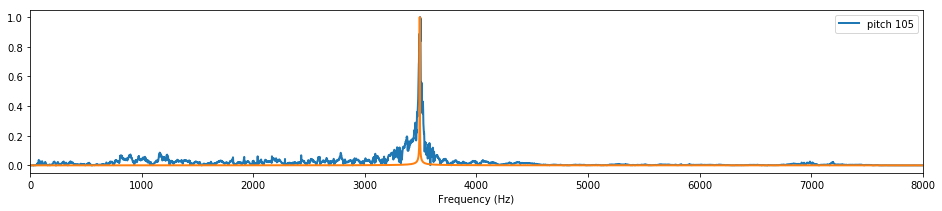

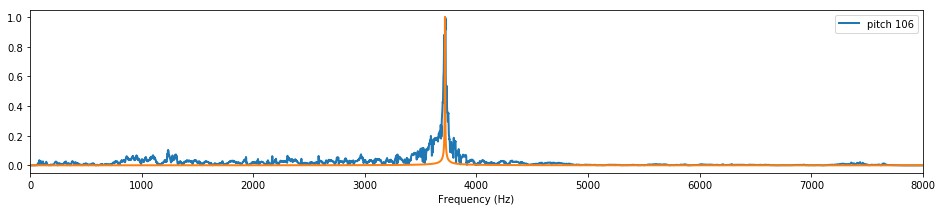

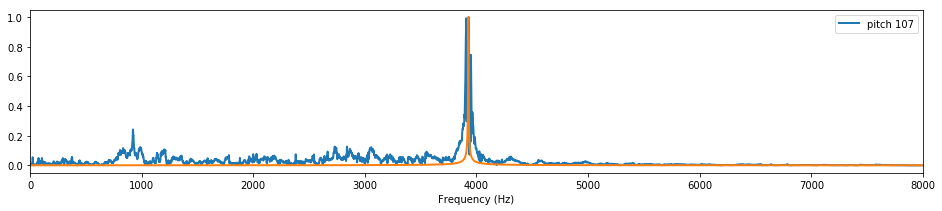

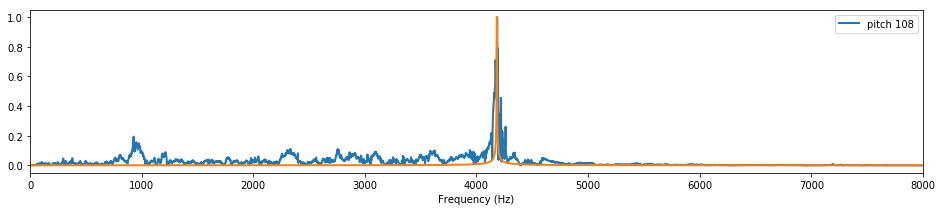

In [5]:
xkernel = np.linspace(0, 10, 10.*fs).reshape(-1, 1)
Fk = np.linspace(0, fs//2, xkernel.size//2).reshape(-1, 1)
Nk = xkernel.size
F = np.linspace(0, fs//2, N//2).reshape(-1, 1)
plt.figure(1)    
#plt.figure(2)
plt.figure(3, figsize=(16, 80))
   
for i in range(Np):
    
    k_plot_model = m[i].kern_com.compute_K(xkernel, np.asarray(0.).reshape(-1,1))
    Yk = fft(k_plot_model.reshape(-1,)) #  FFT data
    Sk =  2./Nk * np.abs(Yk[0:Nk//2]) #  spectral density data
    S = np.abs(fft(m[i].y.value.reshape(-1,))[:N//2])
    
    plt.figure(1) 
    plt.plot(-np.array(m[i].logf))
    plt.xlabel('iteration')
    plt.ylabel('ELBO')
    
#     plt.figure(2)
#     plt.plot(xkernel, k_plot_model, lw=2)

    plt.figure()
    plt.plot(F, S / np.max(np.abs(S)), lw=2)
    plt.plot(Fk, Sk / np.max(np.abs(Sk)), lw=2)
    plt.legend([' Spectral density learned component kernel'])
    plt.xlabel('Frequency (Hz)')
    plt.legend(['pitch ' + midi[i]])
    plt.xlim([0, 8000])

(0, 0.5)

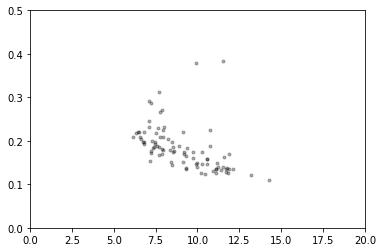

In [6]:
plt.figure(figsize=(6, 4))
for i in range(Np):
    plt.plot(m[i].kern_act.variance.value[0], m[i].kern_act.lengthscales.value[0],
             '.k', alpha=0.3)
    
plt.xlim([0, 20])
plt.ylim([0, 0.5])

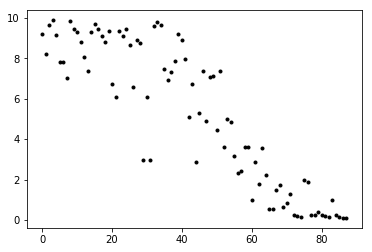

In [7]:
plt.figure(figsize=(6, 4))
for i in range(Np):
    plt.plot(i, m[i].kern_com.lengthscales.value[0], '.k')